# Practical Notebook 2

## Pandas

In this course, we will use pandas to import the data into DataFrame objects.   
Pandas is a commonly used library working with and manipulating data in various formats, such as txt, csv, excel format, and more.  

You can read more about pandas [here](https://pandas.pydata.org/), or by searching online.

In [283]:
# The first thing we need to do is to import pandas
import pandas as pd

# We will aslo change how the floating point numbers are displayed
pd.set_option("display.float_format", lambda x: f"{x:.5f}")

### Creating our own dataset to file

We will start by creating our own data set, but later on we will import the data from a file.

In [284]:
names = ['Alice', 'Bob', 'Charlie']
animals = ['Dog', 'Cat', None]
age = [27, 12, 43]
sex = ['Female', 'Male', 'Male']

We will then merge the lists together using the *zip* function.

In [285]:
people = list(zip(names, animals, age, sex))
print(people)

[('Alice', 'Dog', 27, 'Female'), ('Bob', 'Cat', 12, 'Male'), ('Charlie', None, 43, 'Male')]


Now we can make our merged list into a DataFrame object by using pandas.

In [286]:
df = pd.DataFrame(data=people, columns=['Names','Animals','Age','Sex'])
print(df)

     Names Animals  Age     Sex
0    Alice     Dog   27  Female
1      Bob     Cat   12    Male
2  Charlie    None   43    Male


You can also export the dataframe to a csv file, where we use the function *to_csv* to export the file. You will find the file you created in the folder you are in. (In colab you will find the folder to the left.)
The index parameter is set to *False*, i.e. we won't write the row names to the new file (in this case the row names are *0, 1, 2*). The header parameter is set to *True*, i.e. we will write the column names to the file (in this case the column names are *Names*, *Animals*, *Age*, *Sex*).
You can change these parameters yourself to see the difference.

In [287]:
df.to_csv('test_people.csv', index=False, header=True)

### Read a dataset from file

To read the data from a csv file we will use the function *read_csv*.

In [288]:
df = pd.read_csv('test_people.csv')
print(df)

     Names Animals  Age     Sex
0    Alice     Dog   27  Female
1      Bob     Cat   12    Male
2  Charlie     NaN   43    Male


We can inspect the numerical values in the data using the function describe.

In [289]:
print(df.describe())

           Age
count  3.00000
mean  27.33333
std   15.50269
min   12.00000
25%   19.50000
50%   27.00000
75%   35.00000
max   43.00000


And look at one specific column by using the names of the header.

In [290]:
print(f"Here you will see the names: \n{df['Names']}")
print(f"\nHere you will see the animals: \n{df['Animals']}")
print(f"\nHere you will see the ages: \n{df['Age']}")
print(f"\nHere you will see the sex: \n{df['Sex']}")

Here you will see the names: 
0      Alice
1        Bob
2    Charlie
Name: Names, dtype: object

Here you will see the animals: 
0    Dog
1    Cat
2    NaN
Name: Animals, dtype: object

Here you will see the ages: 
0    27
1    12
2    43
Name: Age, dtype: int64

Here you will see the sex: 
0    Female
1      Male
2      Male
Name: Sex, dtype: object


You can also divide the groups into females and males.

In [291]:
male, female = df['Sex'].value_counts()
print(f"Here we have {male} male(s) and {female} female(s).")

Here we have 2 male(s) and 1 female(s).


By looking only at one column, as we did before, we can find some interesting data about it as well.

In [292]:
# finding the mean value of the ages (with 2 decimals)
print(f"mean: {df['Age'].mean():.2f}")
# and the standard deviation (with 2 decimals)
print(f"std: {df['Age'].std():.2f}")

mean: 27.33
std: 15.50


### Titanic

Now we will download and use a larger dataset, to get a better understanding about the pandas library. The dataset contains passenger data from Titanic, and later on we will predict "what sort of people were most likely to survive?". The passenger data has 7 features: Name, Sex, Socio-economic class, Siblings/Spouses Aboard, Parents/Children Aboard and Fare and a binary responce variable "survived".

In [293]:

# Downloading the titanic dataset
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2023-01-23 14:28:55--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: 'titanic.csv.1'

     0K .......... .......... .......... .......... ...       100%  119K=0,4s

2023-01-23 14:28:56 (119 KB/s) - 'titanic.csv.1' saved [44225/44225]



#### Assignment a)

In [294]:
# ASSIGNMENT:
# Load the data and get familiar with it 
# Use the .describe() method to inspect numerical values
df = pd.read_csv('titanic.csv')
print(df.describe())

       Survived    Pclass       Age  Siblings/Spouses Aboard  \
count 887.00000 887.00000 887.00000                887.00000   
mean    0.38557   2.30552  29.47144                  0.52537   
std     0.48700   0.83666  14.12191                  1.10467   
min     0.00000   1.00000   0.42000                  0.00000   
25%     0.00000   2.00000  20.25000                  0.00000   
50%     0.00000   3.00000  28.00000                  0.00000   
75%     1.00000   3.00000  38.00000                  1.00000   
max     1.00000   3.00000  80.00000                  8.00000   

       Parents/Children Aboard      Fare  
count                887.00000 887.00000  
mean                   0.38331  32.30542  
std                    0.80747  49.78204  
min                    0.00000   0.00000  
25%                    0.00000   7.92500  
50%                    0.00000  14.45420  
75%                    0.00000  31.13750  
max                    6.00000 512.32920  


#### Assignment b)

In [295]:
# ASSIGNMENT:
# Count the number of males and females
male, female = df['Sex'].value_counts()
print("Number of males:", male, "Number of females:", female)


Number of males: 573 Number of females: 314


#### Assignment c)

In [296]:
# ASSIGNMENT:
# Find the mean fare and display with 2 floating point numbers

mean_fare = df['Fare'].value_counts()
print(f"mean: {df['Fare'].mean():.2f}")

# Find the standard deviation of the fare and display with 2 floating point numbers

std_fare = df['Fare'].value_counts()
print(f"std: {df['Fare'].std():.2f}")


mean: 32.31
std: 49.78


#### Assignment d)

In [297]:
# ASSIGNMENT:
# Count how many survived (1) and how many died (0)

# YOUR CODE HERE

died, survived =  df['Survived'].value_counts()
print("How many died:", died, "How many survived:", survived)


How many died: 545 How many survived: 342


#### Assignment e)

In [298]:
# ASSIGNMENT:
# count and display the number of women who surived 
# and the number of men who survived

# YOUR CODE HERE
df_surv_female = df['Survived'] == 1
df_sex_female = df['Sex'] == 'female'
female_survived = df[df_surv_female & df_sex_female].shape[0]

df_surv_male = df['Survived'] == 1
df_sex_male = df['Sex'] == 'male'
male_survived = df[df_surv_male & df_sex_male].shape[0]
print("No of females that survived:", female_survived, "No of males that survived:",  male_survived)


No of females that survived: 233 No of males that survived: 109


#### Assignment f)

In [299]:
# ASSIGNMENT:
# Separate the dataset from Titanic into X and y,
# where y is the column Survived, and X is the rest.
# Inspect the data. Look at for instance the function "describe" in pandas

# YOUR CODE HERE
df = pd.read_csv('titanic.csv')

y = df['Survived']
y_describe = y.describe()
X = df.drop(columns = ['Survived'])

x_describe = X.describe()

#TODO correct? check

print(x_describe, y_describe)


         Pclass       Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
count 887.00000 887.00000                887.00000                887.00000   
mean    2.30552  29.47144                  0.52537                  0.38331   
std     0.83666  14.12191                  1.10467                  0.80747   
min     1.00000   0.42000                  0.00000                  0.00000   
25%     2.00000  20.25000                  0.00000                  0.00000   
50%     3.00000  28.00000                  0.00000                  0.00000   
75%     3.00000  38.00000                  1.00000                  0.00000   
max     3.00000  80.00000                  8.00000                  6.00000   

           Fare  
count 887.00000  
mean   32.30542  
std    49.78204  
min     0.00000  
25%     7.92500  
50%    14.45420  
75%    31.13750  
max   512.32920   count   887.00000
mean      0.38557
std       0.48700
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000


#### Assignment g)

In [300]:
# ASSIGNMENT:
# Standardize the data by subtracting the mean and dividing by the standard deviation.
# Inpect the data again to see that the mean is (close to) zero and the standard deviation is one.

# YOUR CODE HERE


#TODO 
X_new = 0
y_new = 0

# Inspecting the data again:
X_new_describe = X_new.describe()
y_new_describe = y_new.describe()

print(X_new_describe, y_new_describe)


AttributeError: 'int' object has no attribute 'describe'

## Matplotlib

Matplotlib is a commonly used library for visualizing data in Python. Other visualization libraries exist for Python, such as seaborn, plotly, and more. Beyond the first practical notebook, we do not enforce any particular plotting library, but strongly encourage the use of Matplotlib. Below we will use the plotting functions inside of *matplotlib.pyplot*. You can read more about matplotlib [here](https://matplotlib.org/) and pyplot [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot).

### Examples

In [ ]:
# import the relevant libraries
import matplotlib.pyplot as plt
import numpy as np

We will start by looking at some small lists.

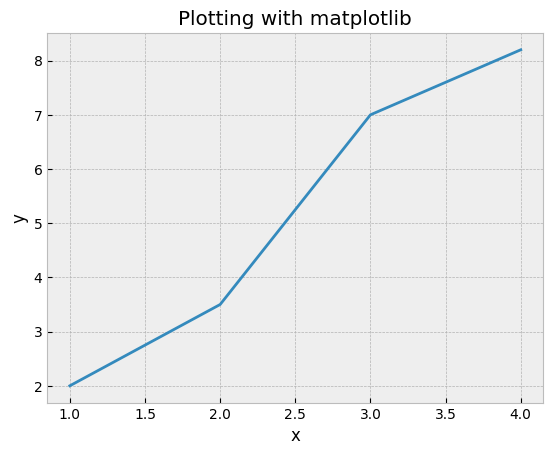

In [ ]:
# examples of some datapoint
x = [1,2,3,4]
y = [2,3.5,7,8.2]

# plotting the data using matplotlib.pyplot.plot
plt.plot(x, y)

# It is important to add labels for the axes and a title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plotting with matplotlib")
# and always end with show(), which will show you the plot.
plt.show()

Plots can also be below each other, or side by side by using [subplot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplot.html).

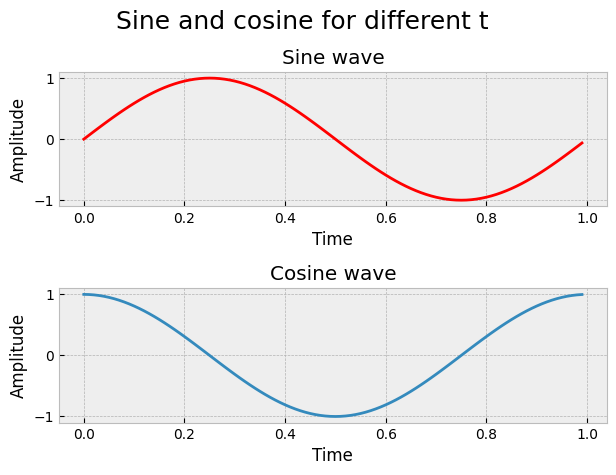

In [ ]:
# Vertical subplot

plt.style.use('bmh')

t = np.arange(0.0, 1.0, 0.01)
sin = np.sin(2*np.pi*t)
cos = np.cos(2*np.pi*t)

fig = plt.figure()
fig.suptitle("Sine and cosine for different t", fontsize=18)

ax1 = fig.add_subplot(2,1,1)
ax1.plot(t, sin, color='red', lw=2)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time')
ax1.set_title('Sine wave')

ax2 = fig.add_subplot(2,1,2)
ax2.plot(t, cos)
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.set_title('Cosine wave')

fig.tight_layout() # comment out this line to see the difference
fig.subplots_adjust(top=0.85)
plt.show()

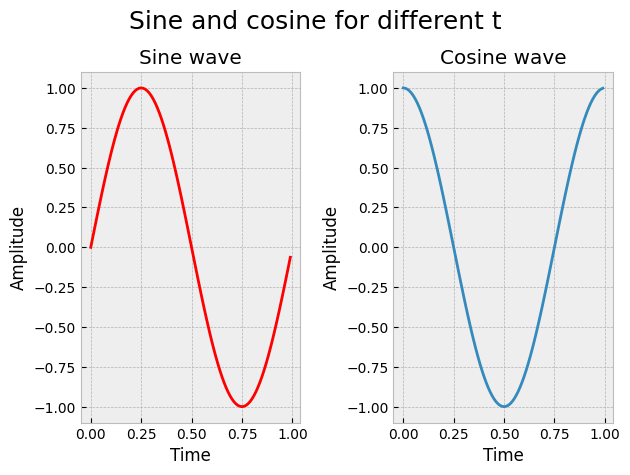

In [ ]:
# Horizontal subplot

plt.style.use('bmh')

t = np.arange(0.0, 1.0, 0.01)
sin = np.sin(2*np.pi*t)
cos = np.cos(2*np.pi*t)

fig = plt.figure()
fig.suptitle("Sine and cosine for different t", fontsize=18)

ax1 = fig.add_subplot(1,2,1)  # we have changed (2,1,1) to (1,2,1)
ax1.plot(t, sin, color='red', lw=2)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time')
ax1.set_title('Sine wave')

ax2 = fig.add_subplot(1,2,2)  # we have changed (2,1,2) to (1,2,2)
ax2.plot(t, cos)
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.set_title('Cosine wave')

fig.tight_layout() # comment out this line to see the difference
fig.subplots_adjust(top=0.85)
plt.show()

And with different stylings

In [ ]:
# Here are all the different "pre-configured" styles matplot lib supports
# https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py 
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

The plotts can also be both below each other and side by side at the same time (as a matrix) as you can see below. Here we have also plotted two graphs together in every figure, and added a color and a label for each one of them.

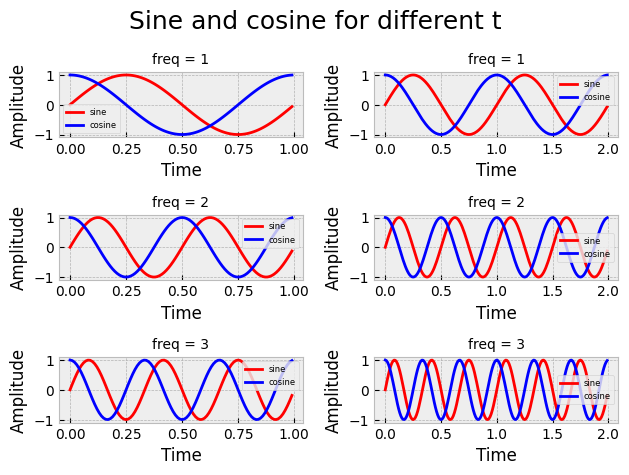

In [ ]:
# Matrix subplot

fig = plt.figure()
fig.suptitle("Sine and cosine for different t", fontsize=18)

i = 1
for freq in [1, 2, 3]:
  for t_max in [1, 2]:
    t = np.arange(0.0, t_max, 0.01)
    sin = np.sin(2*freq*np.pi*t)
    cos = np.cos(2*freq*np.pi*t)

    ax = fig.add_subplot(3,2,i)
    ax.plot(t, sin, color='red', lw=2, label='sine')
    ax.plot(t, cos, color='blue', lw=2, label='cosine')
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time')
    ax.legend(fontsize=6)
    ax.set_title(f'freq = {freq}', fontsize=10)
    i += 1

fig.tight_layout() # comment out this line to see the difference
fig.subplots_adjust(top=0.85)
plt.show()

### Plotting data from Pandas

Now we will plot some of the datapoints from the titanic dataset to visualize it.

In [ ]:
# Downloading the titanic dataset
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2023-01-20 16:13:17--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: 'titanic.csv.3'

     0K .......... .......... .......... .......... ...       100%  144K=0,3s

2023-01-20 16:13:18 (144 KB/s) - 'titanic.csv.3' saved [44225/44225]



In [ ]:
# Load the titanic dataset for plotting
import pandas as pd
df = pd.read_csv('titanic.csv')

#### Assignment h)

Scatter Plot:  


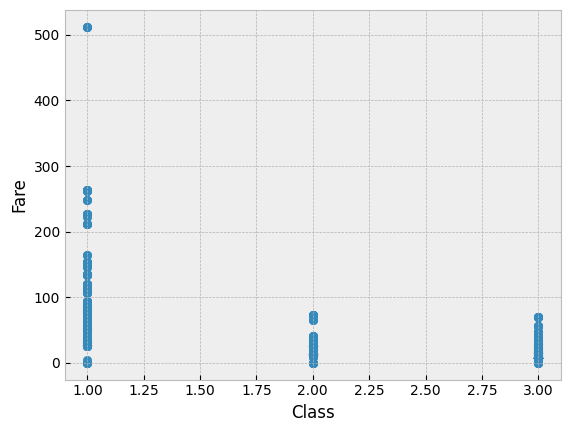

In [ ]:
# ASSIGNMENT:
# make a scatterplot of the class of ticket in the x axis
# and the fare on the y axis
# label the plot and the axes appropriately

# YOUR CODE HERE
df = pd.read_csv('titanic.csv')
print("Scatter Plot:  ")
classfare = df['Pclass']
fare = df['Fare']
plt.scatter(classfare, fare)
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()


#### Assignment i)

It might also be a good idea to plot a histogram over the data, to get a better understanding of how the data looks. This can be done using the function *hist* from matplotlib.

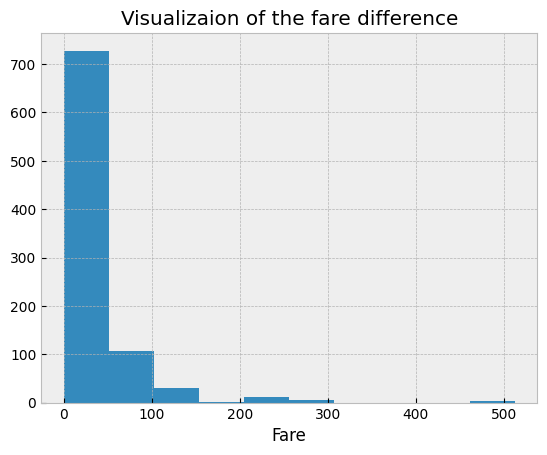

In [ ]:
fare = df["Fare"]
plt.hist(fare)
plt.xlabel("Fare")
plt.title("Visualizaion of the fare difference")
plt.show()

As you can see, most of the people paid less than 150 for the ticket.

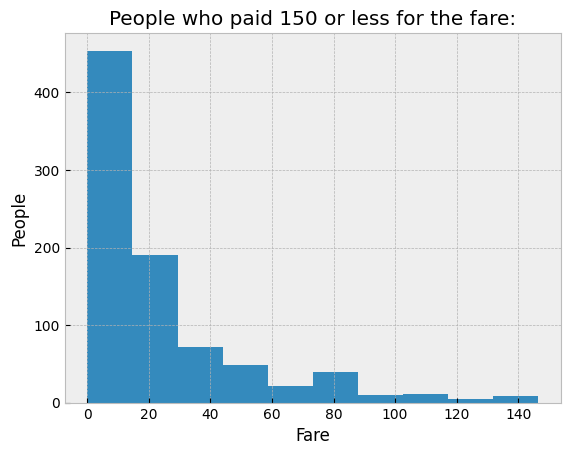

In [301]:
# ASSIGNMENT:
# Plot a histogram over the people who paid less than, or equal to, 150.
# label the plot and the axes appropriately

# YOUR CODE HERE
#TODO 
fare = df["Fare"]
fare_und_150 = fare.loc[fare <= 150].values
plt.hist(fare_und_150)
plt.ylabel("People")
plt.xlabel("Fare")
plt.title("People who paid 150 or less for the fare:")
plt.show()


#### Assignment j)

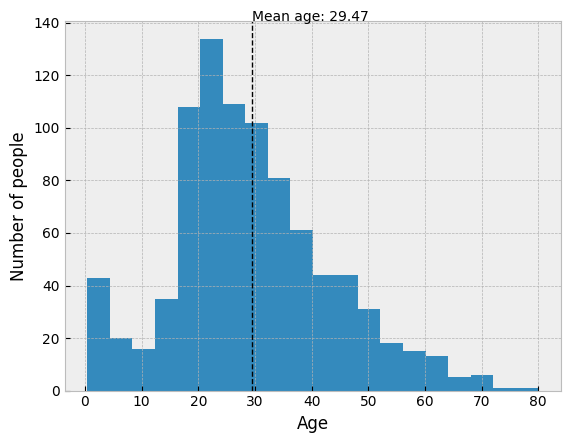

In [302]:
# ASSIGNMENT:
# plot a histogram over all the ages with 20 bins. Draw a vertical line at the mean age.
# label the plot and the axes appropriately

# YOUR CODE HERE
fig = plt.figure()
age = df['Age']
mean_age = df['Age'].mean()
plt.hist(age, 20)
plt.axvline(mean_age, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_age, max_ylim, 'Mean age: {:.2f}'.format(mean_age))
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()



#### Assignment k)

Sometimes it is better to plot the figures together in one figure instead. This can be done with subplot, as shown in the examples above.

(array([ 63.,  51., 242., 211., 142.,  88.,  49.,  28.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

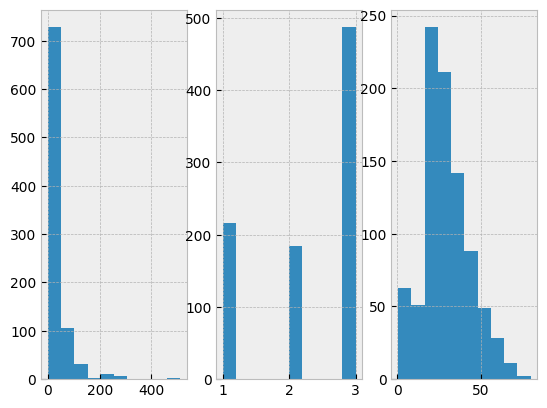

In [326]:
# ASSIGNMENT:
# Make a subplot over the Fare, Class, and Age
# label the plot and the axes appropriately

# YOUR CODE HERE

fig, (ax0, ax1, ax2)  = plt.subplots(nrows = 1, ncols = 3)
ax0.hist(fare)
ax1.hist(classfare)
ax2.hist(age)


#### Assignment l)

Now we want to compare the fare and class, as we did before, but this time we want to divide them into two colors, depending on if they survived or not.

In [327]:
# ASSIGNMENT:
# Make a scatter plot with fare on the y-axis 
# and class on the x-axis 
# using red dots for all the people who died
# and blue dots for the people who survived.
# use different markers for the survived and died points
# label the plot and the axes appropriately

# YOUR CODE HERE
'''

'''


'\n\n'

#### Assignment m)

It might also be interesting to visualize how many of the men and women survived. This can be done with the bar function, which will be given to you.

NameError: name 'female_died' is not defined

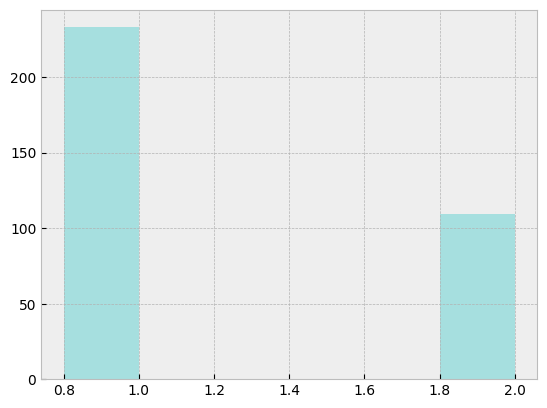

In [328]:
# ASSIGNMENT:
# Calculate how many women and men died and survived.
# label the plot and the axes appropriately

# YOUR CODE HERE

plt.bar([0.9,1.9], [female_survived, male_survived] , color='c', label='survived', width=0.2, alpha=0.3)
plt.bar([1.1, 2.1], [female_died, male_died] , color='r', label='died', width=0.2, alpha=0.3)
plt.xticks([1,2], ['Female','Male'])
plt.legend()
plt.show()

In [ ]:
### (Optional) Ploting a  histogram of a random distribution

OPTIONAL:  
Plotting a Histogram of Random values

Your task is to generate 10000 random numbers that follows the normal distribution, with a mean, $\mu = 1$, and variance $\sigma^2 = 0.25$. 

Plot the **normalized** histogram with 50 bars and a contour plot.   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
np.random.seed(42)

# OPTIONAL ASSIGNMENT:
# Draw 10000 random values from a normal distribution with:
#   mu = 1, sigma2 = 0.25
#  
# Plot the histogram and cumulative distribution 
# label the plot and the axes appropriately


# YOUR CODE HERE

plt.show()